# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> INTRODUCTION: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

Machine learning is a subset of AI that allows systems to learn from their past performance without having to be explicitly programmed. The types of Machine learning are Supervised learning, Unsupervised learning, Semi-Supervised learning, Reinforcement learning. In this report we’ll be talking about Supervised machine learning. 
Now what is supervised learning?
Machine Learn from labelled data in Supervised learning. Since the desired predicted outcome is given and the model is "supervised" to learn the corresponding model parameters, machine learning is referred to as supervised learning. Depending on what you want to predict, supervised learning can used to solve two types of problems: Regression and Classification.



# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> DATA DESCRIPTION: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
Features:
 (V1-V28) - The first transaction in the dataset.
Time- Time feature contains the seconds elapsed between each transaction and the first transaction in the dataset.
Amount-Transaction Amount.
Class- Response variable and takes value 1 in case of fraud and 0 Otherwise.


# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> PROBLEM STATEMENT: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

To Find the fraud in the credit card transaction by building a ML model using different Classification Algorithm and providing a comparison of these algorithm based on its advantage and disadvantage

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> IMPORTING REQUIRED PACKAGES: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> LOADING THE DATASET: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/creditcard12.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> EXPLOREATORY DATA ANALYSIS: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.shape

(284807, 31)

In [7]:
All = data.shape[0]
fraud = data[data['Class'] == 1]
nonFraud = data[data['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %


Text(0.5, 0, 'Class')

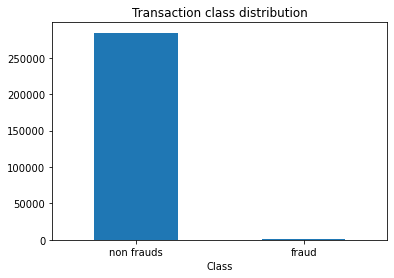

In [8]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(data['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")

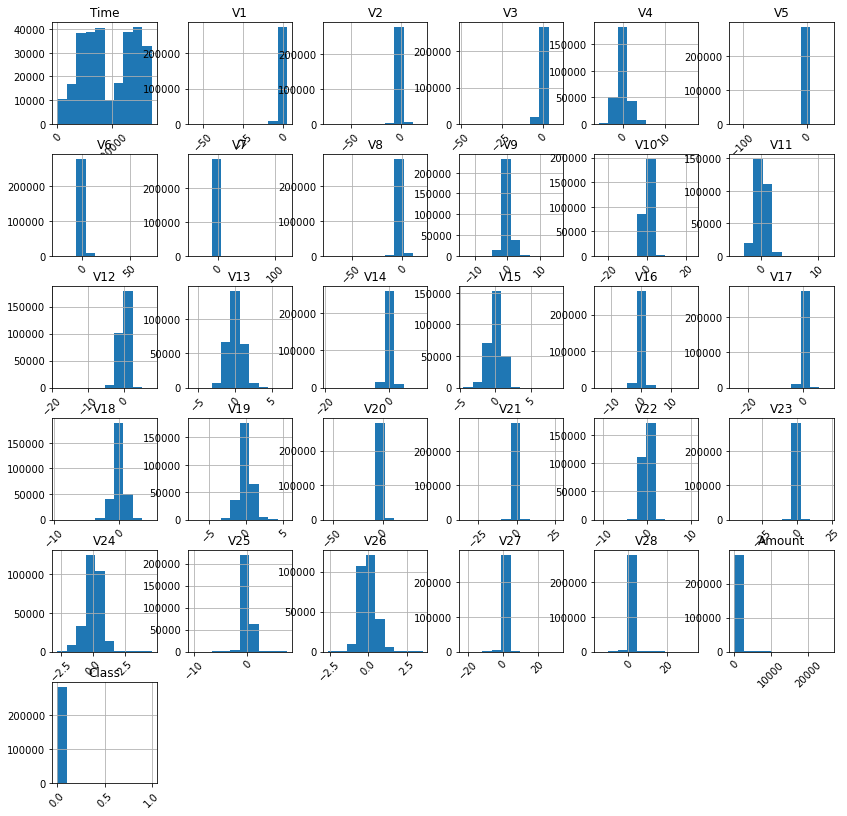

In [9]:
data.hist(figsize=(14,14), xrot=45)
plt.show()


<AxesSubplot:>

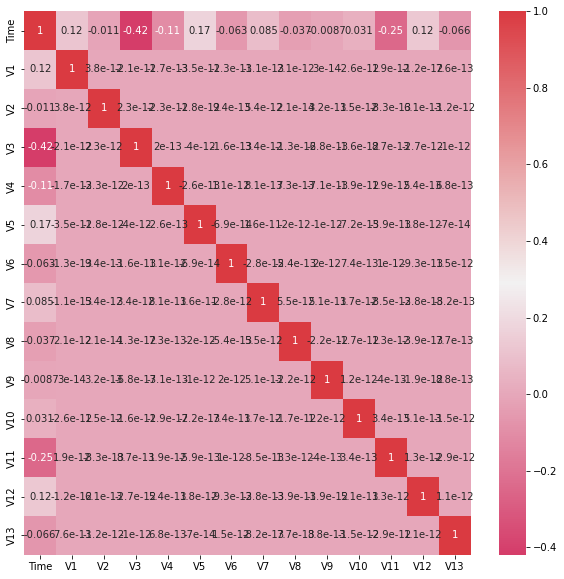

In [10]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,0:14].corr(),cmap=sns.diverging_palette(0000,11,as_cmap=True),annot=True)

<AxesSubplot:>

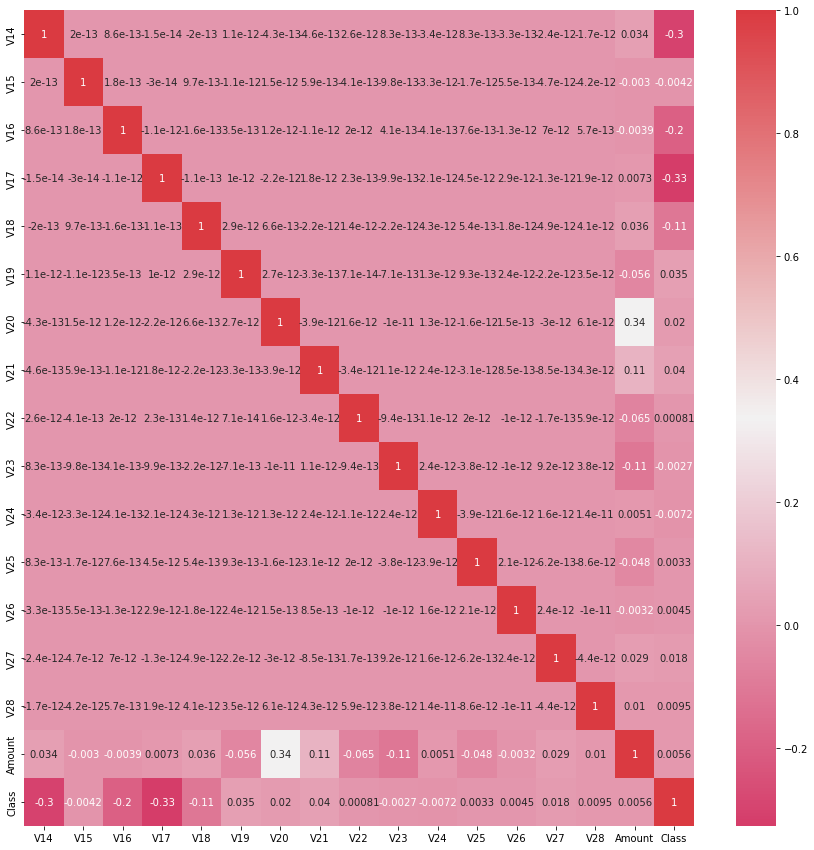

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,14:].corr(),cmap=sns.diverging_palette(0000,11,as_cmap=True),annot=True)


<AxesSubplot:xlabel='V24', ylabel='Count'>

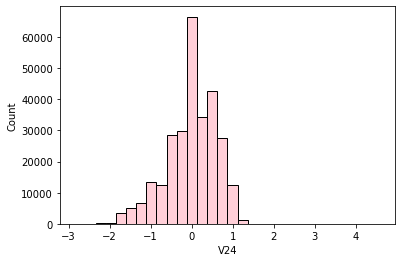

In [12]:
sns.histplot(data['V24'], bins=30,color='pink')

<AxesSubplot:xlabel='V26', ylabel='Count'>

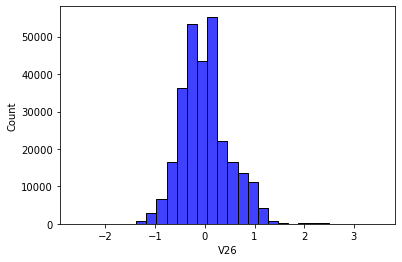

In [13]:
sns.histplot(data['V26'], bins=30,color='blue')

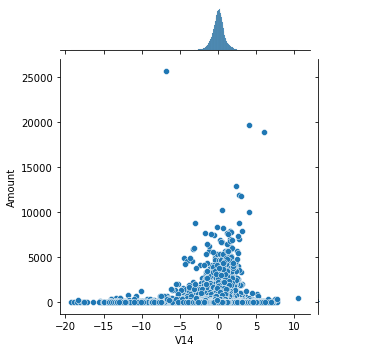

In [14]:
sns.jointplot(x='V14', y='Amount', data=data, size=5)

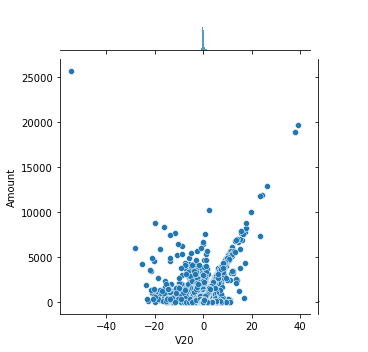

In [15]:
sns.jointplot(x='V20', y='Amount', data=data, size=5)

<AxesSubplot:ylabel='Density'>

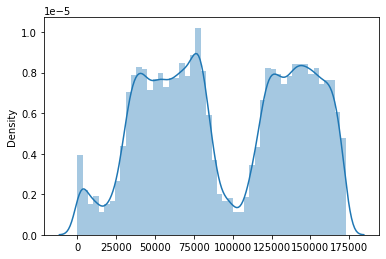

In [16]:
# distribution of Time
time = data['Time'].values
sns.distplot(time)

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> DECLARING X AND y VARIABLE: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [17]:
y=data['Class']
X=data.drop('Class',axis=1)

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> TRAINING AND SPLITTING OF DATA TO REDUCE OVERFITTING: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, shuffle=True)

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> CHECKING WHETHER THERE IS IMBALANCE IN y VARIABLE: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [19]:
count_sub1 = len(data[data['Class']==0])
count_sub2 = len(data[data['Class']==1])

pct_of_sub1 = count_sub1/(count_sub1+count_sub2)
print("percentage of subscription", pct_of_sub1*100)

pct_of_sub2 = count_sub2/(count_sub1+count_sub2)
print("percentage of subscription", pct_of_sub2*100)

percentage of subscription 99.82725143693798
percentage of subscription 0.1727485630620034


# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))

print("Number of subscription",len(os_data_y[os_data_y['Class']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Class']==1]))

print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  398038
Number of subscription 199019
Number of subscription 199019
Proportion of subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;">PERFORMING PRINCIPAL COMPONENT ANALYSIS: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
# Apply transform to both the training set and the test set instead of using fit_transform at once.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

In [24]:
from sklearn.decomposition import PCA
# PCA is intialized
pca = PCA(.95)

In [25]:
pca.fit(train_img)

PCA(n_components=0.95)

In [26]:
pca.n_components_

27

In [27]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;">FITTING LOGISTIC REGRESSION MODEL: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR = LinearRegression()

In [30]:
LR.fit(train_img, y_train)

LinearRegression()

In [31]:
y_pred=LR.predict(test_img)

In [32]:
LR.score(test_img, y_test)

0.5070766736667607

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5070766736667607

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.004059370025388949

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0008465885558492368

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;">LOGISTIC REGRESSION WITHOUT PCA: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

In [36]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))#score() gives classification accuracy measure

Accuracy of logistic regression classifier on test set: 0.97


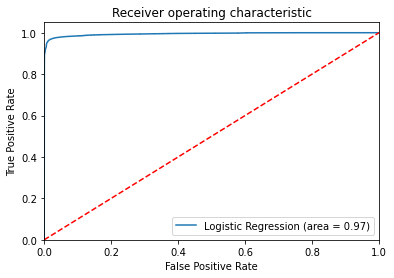

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))#computes AUC under ROC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])#creates ROC 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> GAUSSIAN NAIVE BAYES APPROACH: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of P(xi | y).In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped -curve which is symmetric about the mean of the feature values. The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of P(xi | y).

In [39]:
#DEFINING MY FUNCTION:
def mfunc(X, y, typ):
    #Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)
    # Predict class labels on a test data
    pred_labels = model.predict(X_test)
    # Print model attributes
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else:
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
    #Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    #Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels
    

In [40]:
# Fit the model and print the result
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(os_data_X, os_data_y, GaussianNB())


Classes:  [0 1]
Class Priors:  [0.49931225 0.50068775]
--------------------------------------------------------
Accuracy Score:  0.8713194653803638
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     40023
           1       0.99      0.75      0.85     39585

    accuracy                           0.87     79608
   macro avg       0.89      0.87      0.87     79608
weighted avg       0.89      0.87      0.87     79608



# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> DECISION TREE- CLASSIFICATION: </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

Decision Trees Classifiers are a type of Supervised Machine .Decision trees are used both in regression and classification problem. Learning meaning we build a model, we feed training data matched with correct outputs and then we let the model learn from these patterns. Then we give our model new data that it hasn’t seen before so that we can see how it performs. And because we need to see what exactly is to be trained for a Decision Tree.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DTC = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

In [43]:
DTC.fit(X_train, y_train)
y_pred_DTC = DTC.predict(X_test)


In [44]:
# --- Decision Tree Accuracy ---
from sklearn.metrics import accuracy_score
DTCAc = accuracy_score(y_pred_DTC, y_test)
print('ACCURACY OF DECISION TREE:'+'\033[1m {:.2f}%'.format(DTCAc*100))

ACCURACY OF DECISION TREE: 93.76%


In [45]:
# --- Decision Tree Classification Report ---
print('\n\033[1m'+'CLASSIFICATION REPORT'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))



CLASSIFICATION REPORT
*************************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     40023
           1       0.95      0.92      0.94     39585

    accuracy                           0.94     79608
   macro avg       0.94      0.94      0.94     79608
weighted avg       0.94      0.94      0.94     79608



In [46]:
#We get an accuracy of 0.94 which means our model is a good one. Here

# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> RANDOM FOREST :</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

Random Forest Classifier is ensemble algorithm. In next one or two posts we shall explore such algorithms. Ensembled algorithms are those which combines more than one algorithm of same or different kind for classifying objects. For example, running prediction over Naive Bayes, SVM and Decision Tree and then taking vote for final consideration of class for test object.

In [49]:
y=data['Class']
X=data.drop('Class',axis=1)

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)


from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

0.0017304750013189597


In [50]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Random Forest classifier
The accuracy is  0.9982795547909132
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0


# <div style="font-family: Calibri; background-color: #FF5C8A; color: #FFFF; padding: 12px; line-height: 1.5;"> CONCLUSION :</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
   
</div>

The use of different classification Algorithm for fraud in credit card dataset. The highest accuracy is obtained by Random- forest classification algorithm. The Accuracy obtained using Random -forest classifier is 0.99. This being ensemble algorithm combines combines more than one algorithm of same or different kind for classifying objects and then taking vote for final consideration of class for test object. So we can say that Random forest have good accuracy when compared to other algorithms like logistic, Naïve bayes etc for this dataset. The accuracy obtained for logistic with PCA is 0.50 but when logistic is done without PCA accuracy is 0.97. So with PCA reduction in accuracy maybe because of loss in information. Naive bayes Gaussian get an accuracy of 87% and Decision with accuracy of 93%.      